# Credit card Details Binary Classification Problem

Please visit this page and start connecting : https://www.linkedin.com/in/soni-agung-wahyudiyanta-285901180/ 


**Judul Projek: Identifikasi Transaksi Kartu Kredit Mencurigakan Menggunakan Machine Learning**

**Introduction:**

* Kemajuan teknologi dalam bidang keuangan telah memberikan kemudahan akses ke layanan perbankan dan pembayaran. Dengan semakin banyaknya transaksi kartu kredit yang terjadi setiap hari, menjaga keamanan dan keandalan sistem pembayaran menjadi krusial. Kecurangan kartu kredit dan transaksi yang mencurigakan merupakan ancaman serius bagi pelanggan dan penyedia layanan keuangan.
<br>
* Proyek ini bertujuan untuk mengatasi masalah tersebut dengan mengembangkan sebuah model machine learning yang mampu mengidentifikasi transaksi kartu kredit yang mencurigakan.

**Tujuan:**

* Membangun model machine learning yang dapat mengklasifikasikan transaksi kartu kredit sebagai "mencurigakan" atau "tidak mencurigakan" berdasarkan atribut-atribut yang tersedia.

* Meningkatkan keamanan dan deteksi potensi kecurangan dalam transaksi kartu kredit untuk melindungi pelanggan dan penyedia layanan keuangan.

* Memberikan dasar bagi pengambilan keputusan yang lebih baik dalam mengidentifikasi transaksi yang memerlukan pemeriksaan lebih lanjut.

In [1]:
import matplotlib.pyplot as plt
import pandas as np
import pandas as pd
import seaborn as sns

# IMPORT DATA

fake study case = https://www.kaggle.com/datasets/rohitudageri/credit-card-details/download?datasetVersionNumber=1

In [2]:
credit=pd.read_csv('Credit_card.csv')
credi_label = pd.read_csv('Credit_card_label.csv')

In [3]:
df = credit.merge(credi_label, on='Ind_ID', how='inner')

In [4]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


# Data Understanding


In [6]:
print(f'banyak data ada :{df.shape[0]} dengan jumlah kolom {df.shape[1]}') 

banyak data ada :1548 dengan jumlah kolom 19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

# Data Cleaning

In [11]:
miss = df.columns[df.isna().any()].tolist()
miss

['Annual_income', 'Birthday_count']

In [12]:
# missing value type OBJECT
for column in df.columns:
    if df[column].dtype == 'object':
        mode_val = df[column].mode().iloc[0]
        df[column].fillna(mode_val, inplace=True)
    


In [13]:
# missing value type NUMERIC
for column in miss:
    if df[column].isna().any :
        mean_val = df[column].mean()
        df[column].fillna(mean_val, inplace=True)

In [14]:
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [15]:
uniq = df.duplicated().sum()
if uniq ==0:
    print('tidak ada data duplikat = 0')
else:
    print('ada data yang duplikat')


tidak ada data duplikat = 0


C:\Users\HP\AppData\Local\Temp\ipykernel_13092\1058649142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


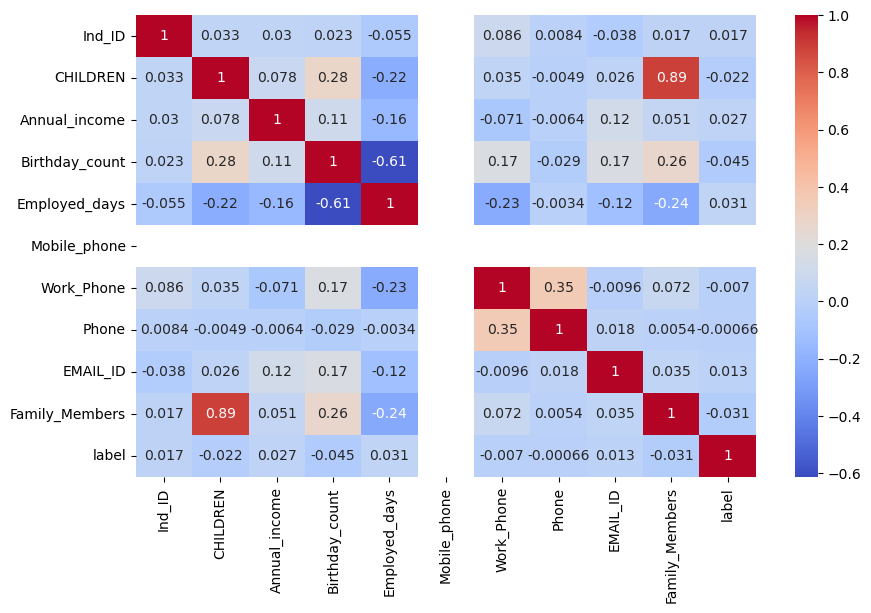

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Features Engineering

In [18]:
dff = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le =LabelEncoder()

In [21]:
for column in dff.columns:
    if dff[column].nunique()<=2:
        dff[column]=le.fit_transform(dff[column])

In [22]:
dff = dff.drop(['Ind_ID'], axis=1)

In [23]:
features = dff[['GENDER','Car_Owner','Propert_Owner', 'Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation','CHILDREN','Annual_income','Family_Members','label' ]]

In [41]:
data_ori = df[['GENDER','Car_Owner','Propert_Owner', 'Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation','CHILDREN','Annual_income','Family_Members','label' ]]

In [24]:
# kita akan menggunakan features ini karena berpengaruh terhadap label 
features.nunique()

GENDER               2
Car_Owner            2
Propert_Owner        2
Type_Income          4
EDUCATION            5
Marital_status       5
Housing_type         6
Type_Occupation     18
CHILDREN             6
Annual_income      116
Family_Members       7
label                2
dtype: int64

In [25]:
dfnumb = pd.get_dummies(features)

In [54]:
# Data Ori
data_ori.head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,CHILDREN,Annual_income,Family_Members,label
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,Laborers,0,180000.00000,2,1
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Laborers,0,315000.00000,2,1
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Laborers,0,315000.00000,2,1
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Laborers,0,191399.32623,2,1
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Laborers,0,315000.00000,2,1


In [53]:
# Data setelah dilabel encoded
dfnumb.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,label,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.00000,2,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,191399.32623,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


# EDA (Exploratory Data Analyst)

In [27]:
print(f' Menggunakan features ini untuk di analisa \n\n{features.columns.values.T} \n\nkarena dengan jumlah terbanyak dan mempengaruhi label')

 Menggunakan features ini untuk di analisa 

['GENDER' 'Car_Owner' 'Propert_Owner' 'Type_Income' 'EDUCATION'
 'Marital_status' 'Housing_type' 'Type_Occupation' 'CHILDREN'
 'Annual_income' 'Family_Members' 'label'] 

karena dengan jumlah terbanyak dan mempengaruhi label


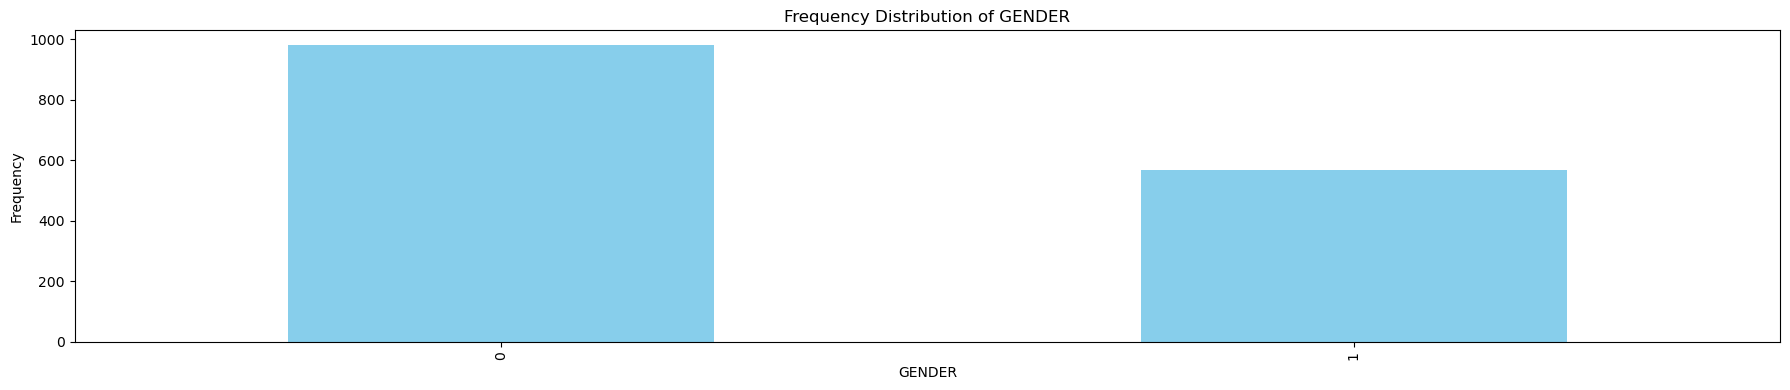

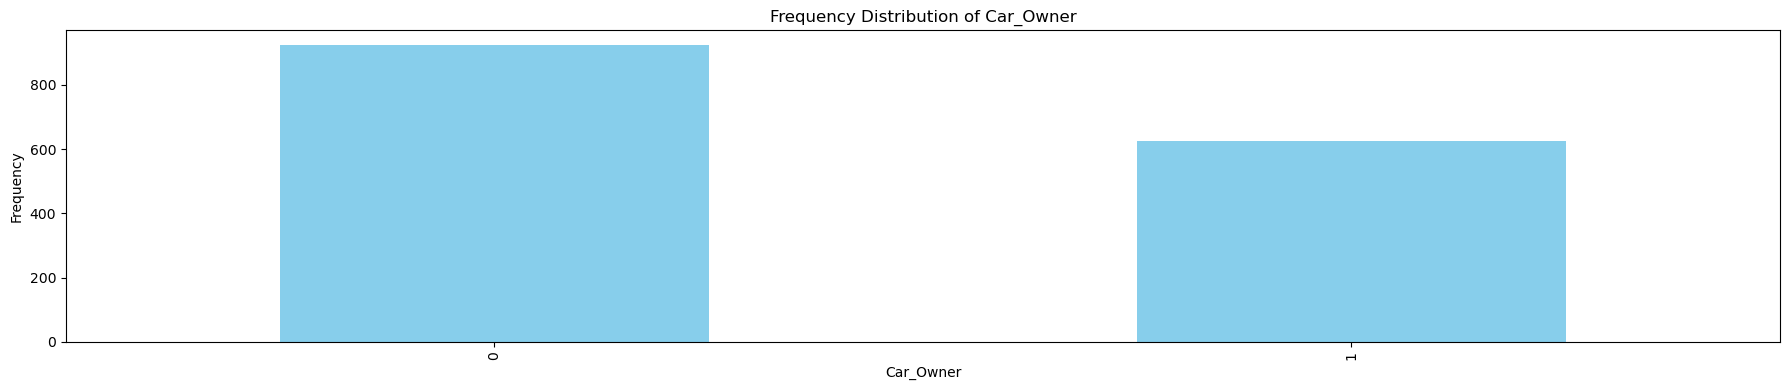

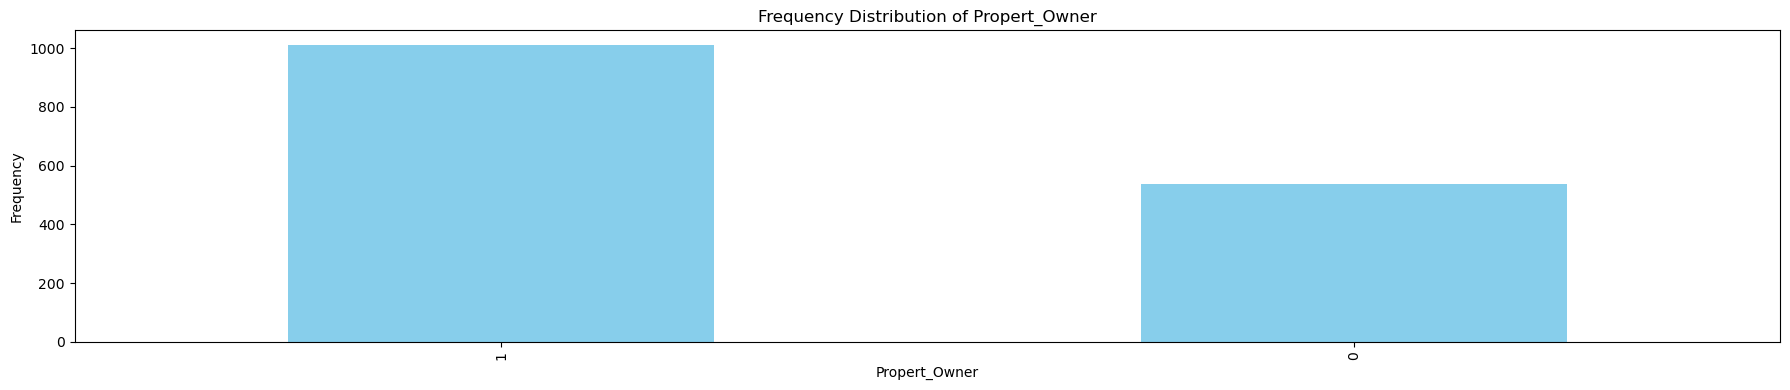

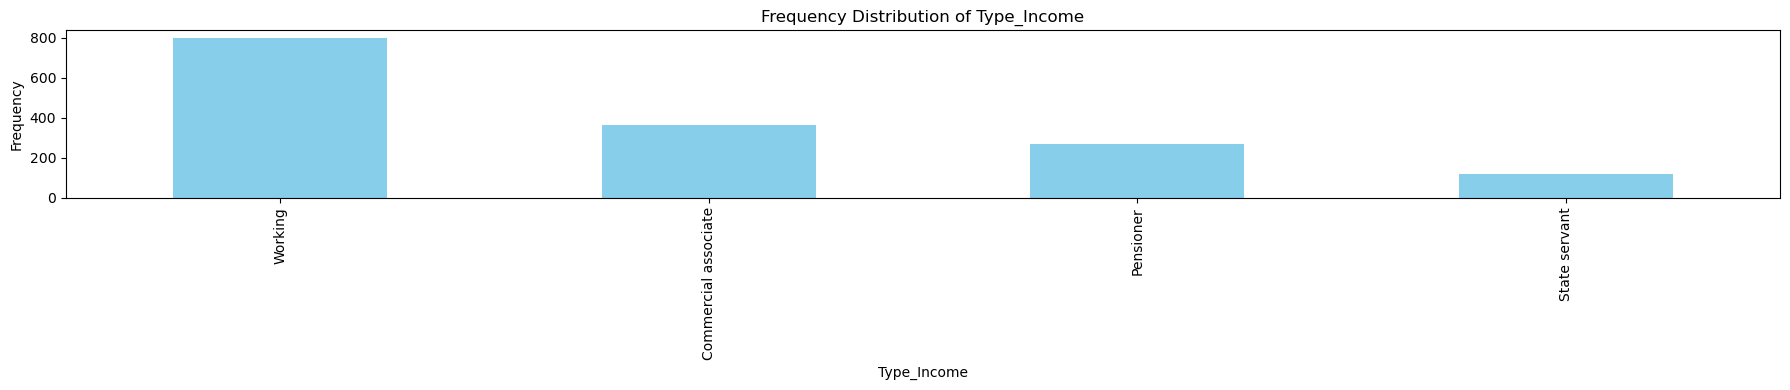

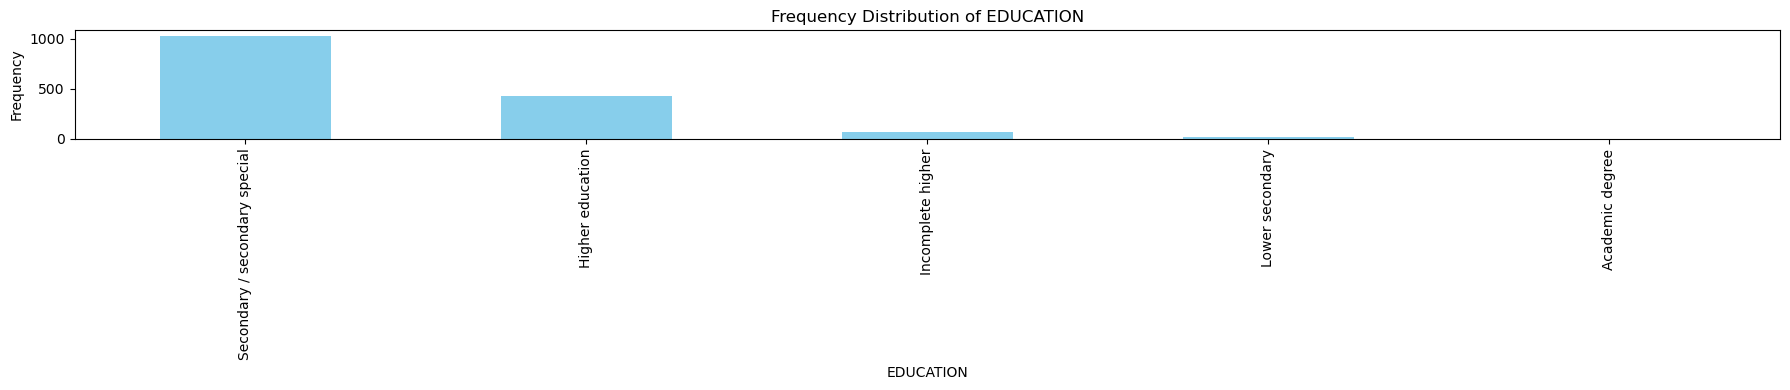

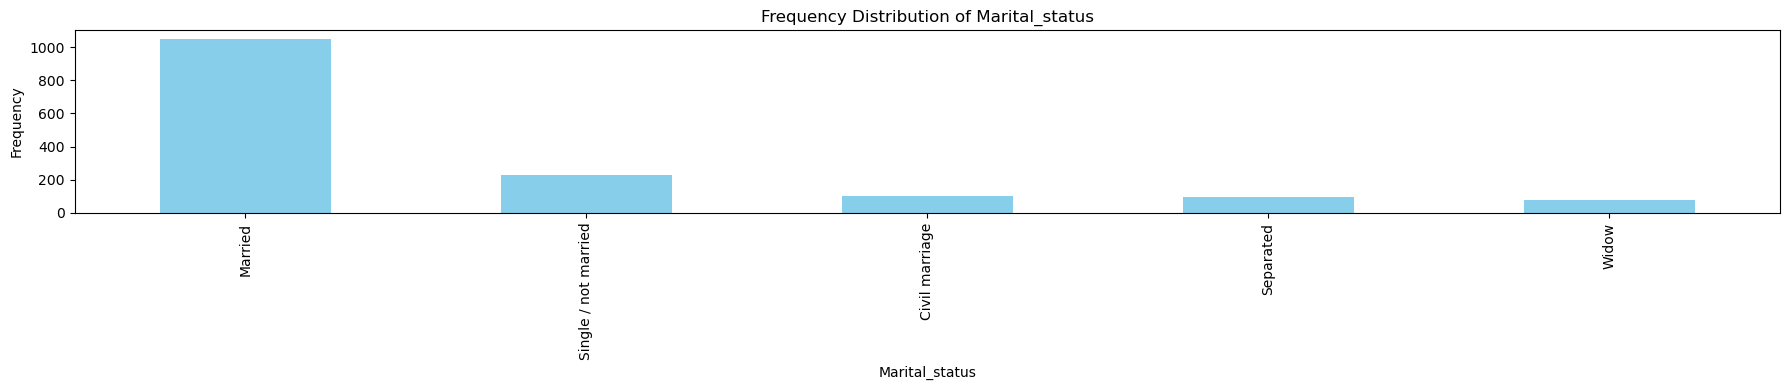

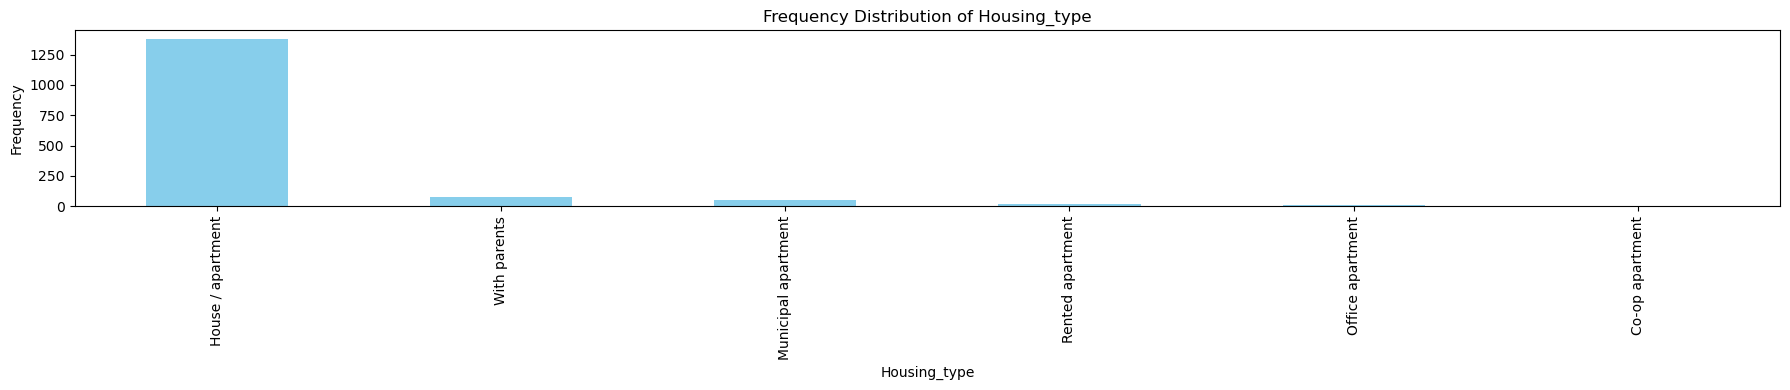

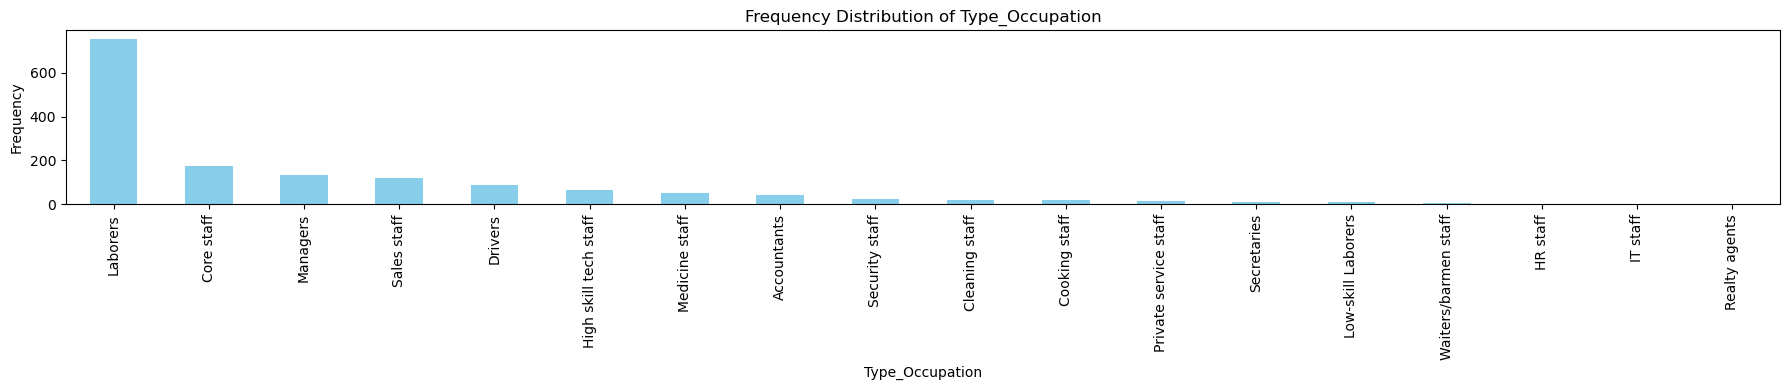

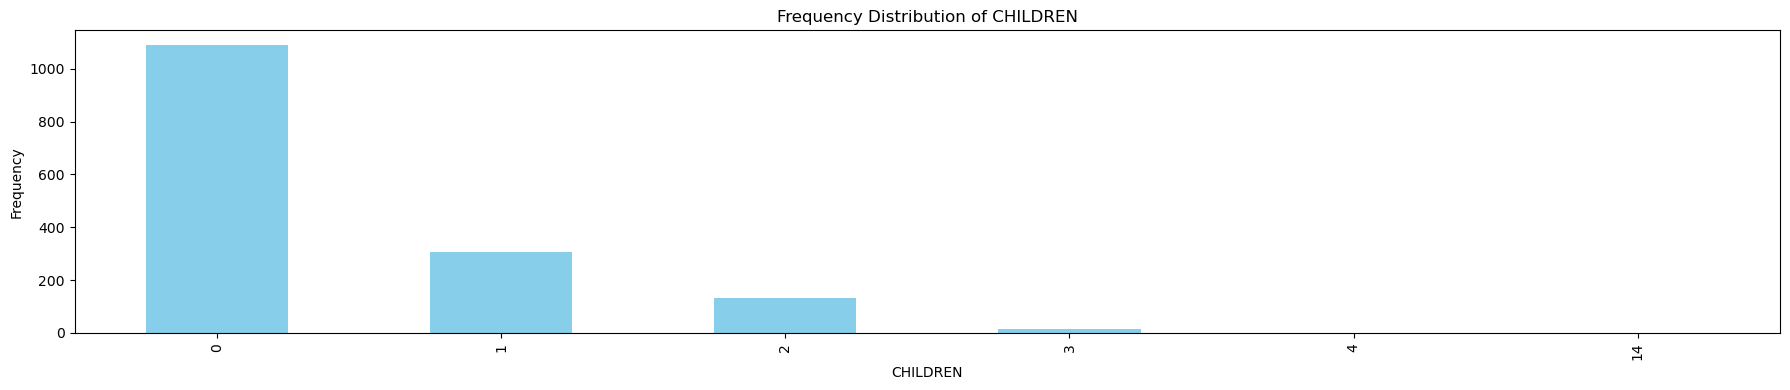

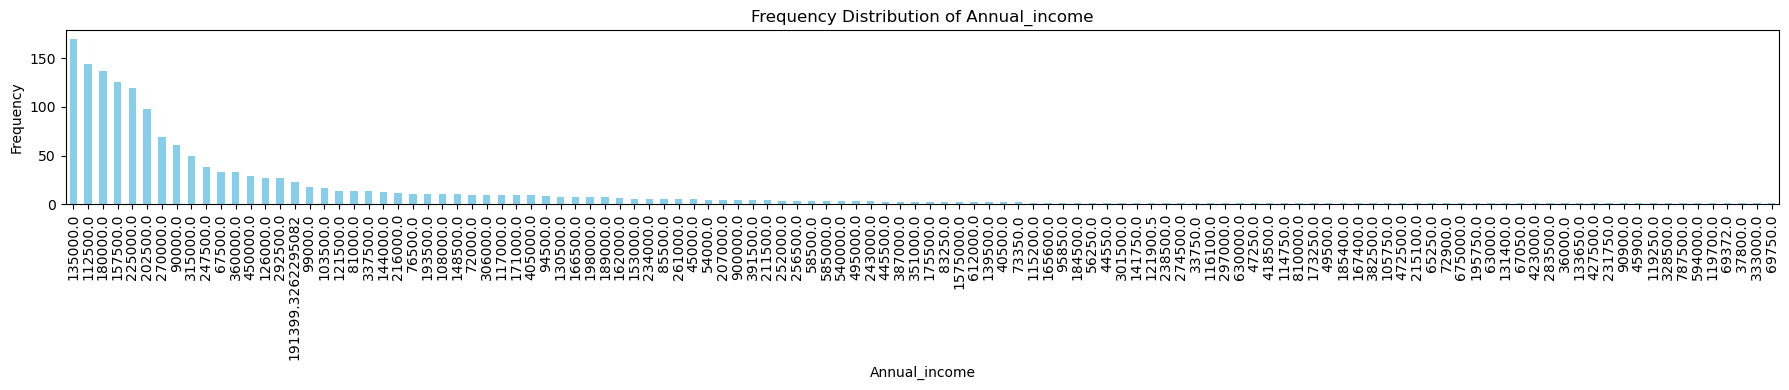

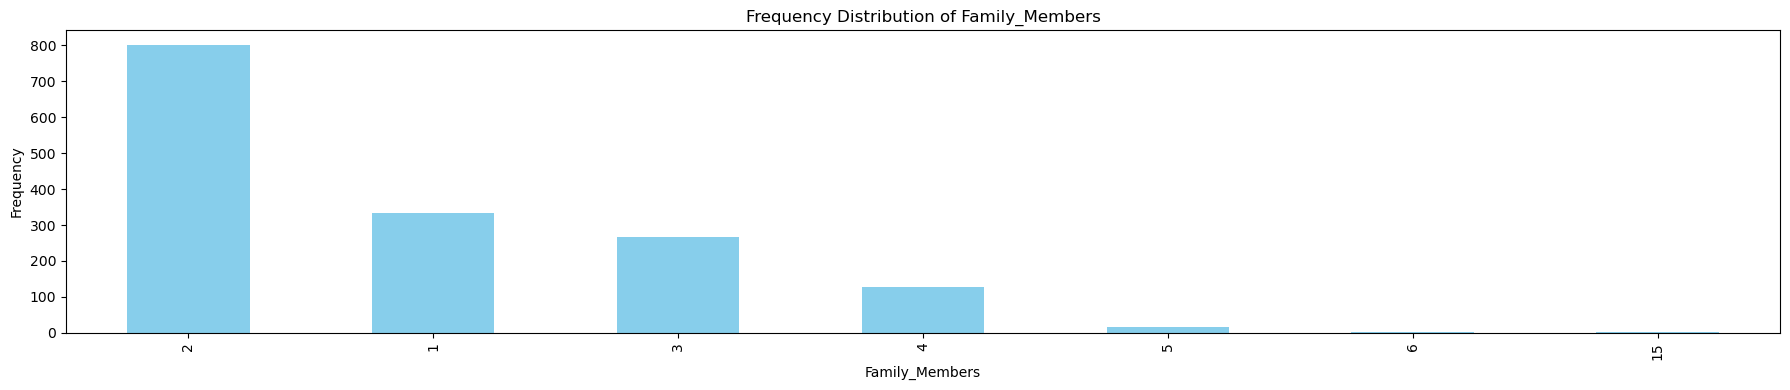

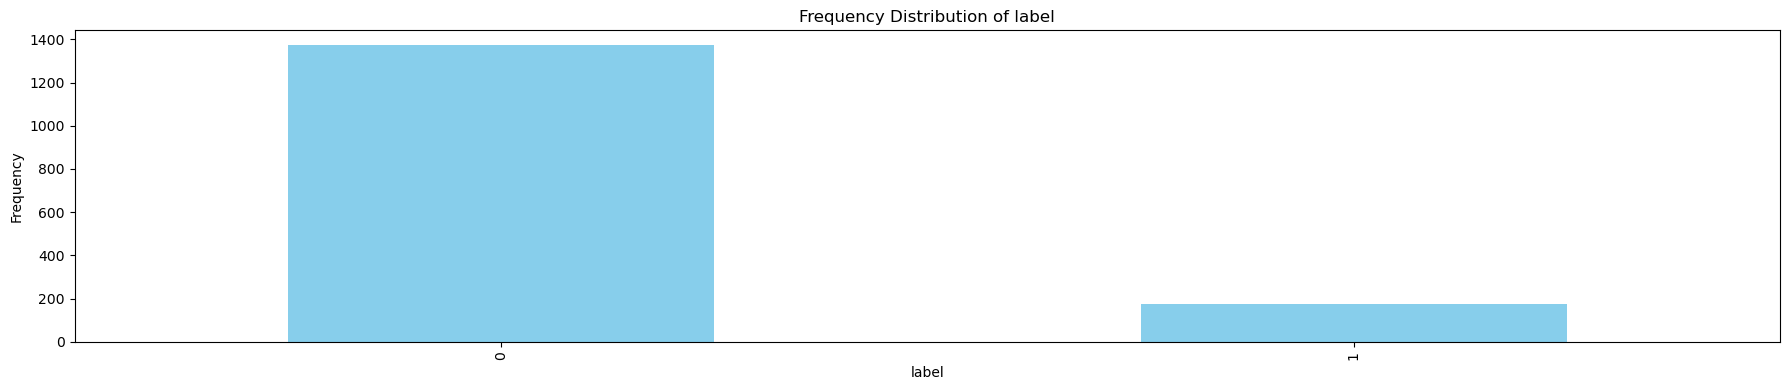

In [52]:
for column in features.columns:
    
    plt.figure(figsize=(18, 4))  
    features[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  
    plt.tight_layout()
    plt.show()


In [58]:
data_ori.describe(include='object').T

,count,unique,top,freq
GENDER,1548,2,F,980
Car_Owner,1548,2,N,924
Propert_Owner,1548,2,Y,1010
Type_Income,1548,4,Working,798
EDUCATION,1548,5,Secondary / secondary special,1031
Marital_status,1548,5,Married,1049
Housing_type,1548,6,House / apartment,1380
Type_Occupation,1548,18,Laborers,756


In [61]:
data_ori.describe().T

,count,mean,std,min,25%,50%,75%,max
CHILDREN,1548.0,0.412791,0.776691,0.0,0.0,0.0,1.0,14.0
Annual_income,1548.0,191399.326230,112407.951318,33750.0,121500.0,171000.0,225000.0,1575000.0
Family_Members,1548.0,2.161499,0.947772,1.0,2.0,2.0,3.0,15.0
label,1548.0,0.113049,0.316755,0.0,0.0,0.0,0.0,1.0


**Insight :**
    
jenis kelamin perempuan dengan tidak punya mobil tetapi memiliki properti pribadi , jenis pemasukan dari bekerja , memiliki pendidikan Secondary /SD, SMP, sMK serta memiliki status sudah menikah dengan type rumah tempat tinggal rumah/apartemen,  serta seorang pekerja manual atau pekerja fisik yang melakukan pekerjaan yang memerlukan tenaga fisik dan mungkin tidak memerlukan kualifikasi pendidikan khusus. <br>
kemudian customer dengan tidak memiliki anak , pemasukan dikisaran 135.000.0 dengan anggota keluarga 2 orang memiliki count terbanyak. Serta label dengan 


# Label / Suspicious


In [32]:
features.label.value_counts()

0    1373
1     175
Name: label, dtype: int64

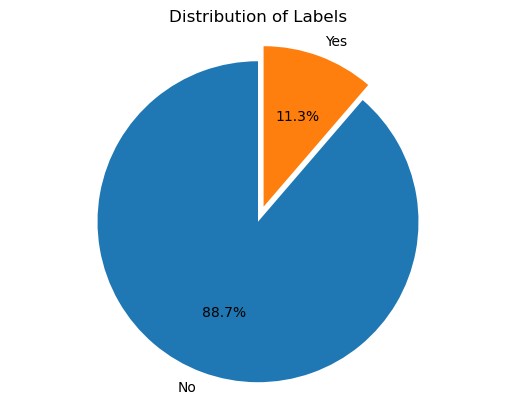

In [34]:
labels = ['No', 'Yes']
sizes = features['label'].value_counts()
explode = 0,0.1
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = explode)
plt.axis('equal')  
plt.title('Distribution of Labels')
plt.show()

Terdapat hasil bahwa tingkat customer mencurigakan hanya 11.3% atau sekitar 175 customer sedangkan tingkat keamanan masih di angka 88.7% sekitar 1375 customer. <br>
Ini berarti masih banyak customer yang bertransaksi dengan benar dan sedikit yang bertransaksi mencurigakan

# **Features vs Suspicious**

**Gender vs Suspicious**

In [197]:
by_gender= data_ori.groupby(['GENDER'])['label'].value_counts(normalize=True).rename('ratio').reset_index()


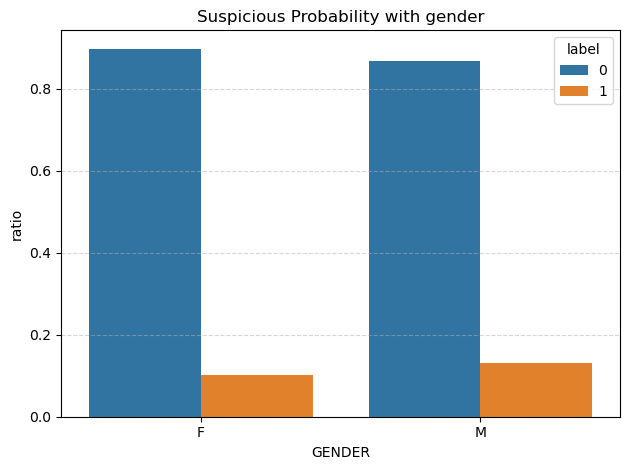

In [198]:
sns.barplot(x='GENDER', y='ratio',hue='label', data=by_gender)
plt.title('Suspicious Probability with gender')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [201]:
by_gender

,GENDER,label,ratio
0,F,0,0.897959
1,F,1,0.102041
2,M,0,0.867958
3,M,1,0.132042


Customer Laki-laki cenderung lebih banyak melakukan transaksi mencurigakan dari pada Perempuan.

**Car Owner vs Suspicious**

In [202]:
by_car=data_ori.groupby(['Car_Owner'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

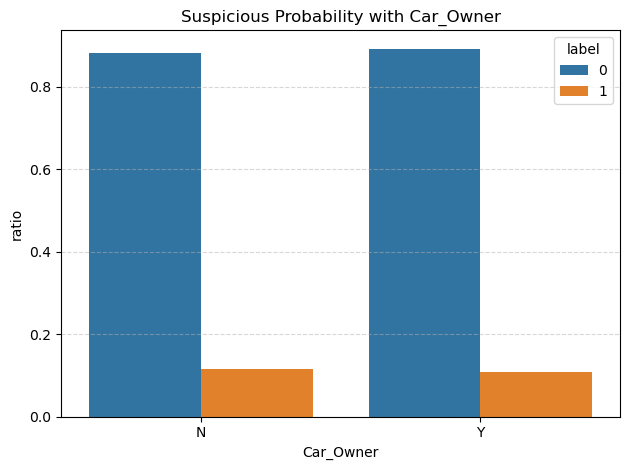

In [203]:
sns.barplot(x='Car_Owner', y='ratio',hue='label', data=by_car)
plt.title('Suspicious Probability with Car_Owner')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [204]:
by_car

,Car_Owner,label,ratio
0,N,0,0.883117
1,N,1,0.116883
2,Y,0,0.892628
3,Y,1,0.107372


Customer dengan tidak memiliki mobil pribadi cenderung melakukan transaksi mencurigakan terbanyak dari pada yang memiliki mobil.

**Propert_Owner vs Suspicious**

In [205]:
by_proper = data_ori.groupby(['Propert_Owner'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

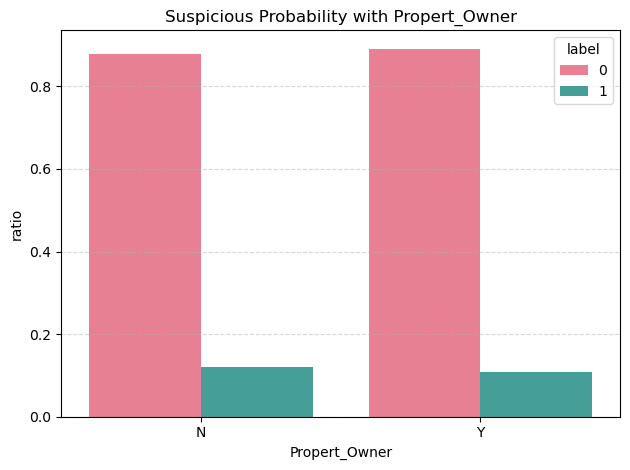

In [206]:
sns.barplot(x='Propert_Owner', y='ratio',hue='label', data=by_proper, palette='husl')
plt.title('Suspicious Probability with Propert_Owner')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [207]:
by_proper

,Propert_Owner,label,ratio
0,N,0,0.879182
1,N,1,0.120818
2,Y,0,0.891089
3,Y,1,0.108911


Customer dengan tidak memiliki propreti pribadi cenderung lebih banyak melakukan transaksi mencurigakan.

**CHILDREN vs Suspicious**

In [195]:
by_child =  data_ori.groupby(['CHILDREN'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

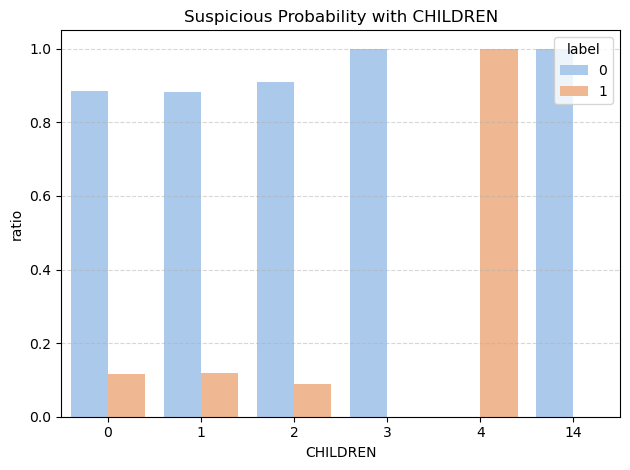

In [196]:
sns.barplot(x='CHILDREN', y='ratio',hue='label', data=by_child, palette='pastel')
plt.title('Suspicious Probability with CHILDREN')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.show()


In [208]:
by_child

,CHILDREN,label,ratio
0,0,0,0.884510
1,0,1,0.115490
2,1,0,0.881967
3,1,1,0.118033
4,2,0,0.910448
5,2,1,0.089552
6,3,0,1.000000
7,4,1,1.000000
8,14,0,1.000000


Customer dengan mempunyai anak 4 cenderung signifikan banyak melakukan transaksi mencurigakan terbanyak, Sedangkan dengan mempunyai anak 3 & 14 malah tidak terdapat transaksi mencurigakan.

**Type_Income vs Suspicious**

In [211]:
by_income = data_ori.groupby(['Type_Income'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

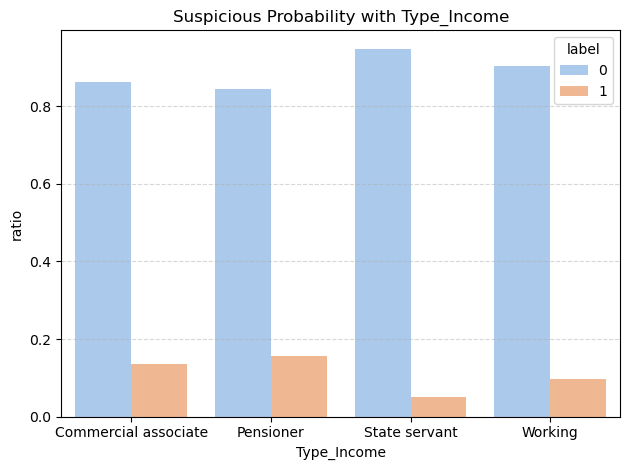

In [212]:
sns.barplot(x='Type_Income', y='ratio',hue='label', data=by_income, palette='pastel')
plt.title('Suspicious Probability with Type_Income')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.show()


In [214]:
by_income.sort_values(by='ratio', ascending=False)

,Type_Income,label,ratio
4,State servant,0,0.948276
6,Working,0,0.903509
0,Commercial associate,0,0.863014
2,Pensioner,0,0.843866
3,Pensioner,1,0.156134
1,Commercial associate,1,0.136986
7,Working,1,0.096491
5,State servant,1,0.051724


Customer dengan pemasukan jenis Pensioner memiliki jumlah transaksi mencurigakan terbanyak 

**EDUCATION vs Suspicious**

In [217]:
by_edu = data_ori.groupby(['EDUCATION'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

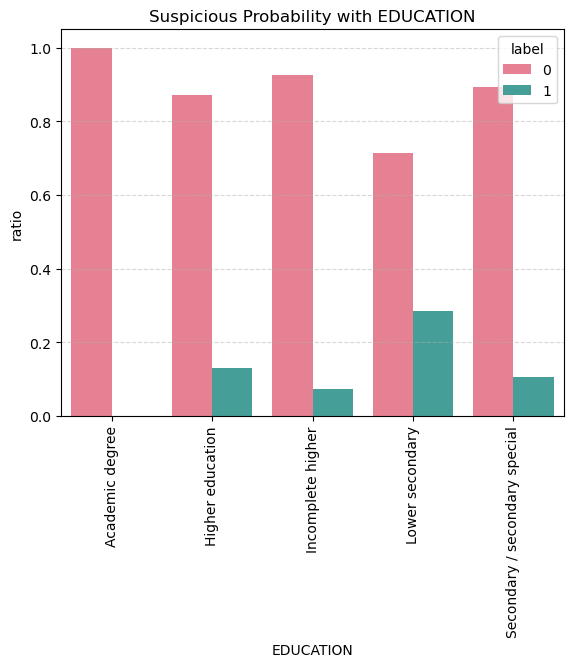

In [222]:
sns.barplot(x='EDUCATION', y='ratio',hue='label', data=by_edu, palette='husl')
plt.title('Suspicious Probability with EDUCATION')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =90)
plt.show()


In [221]:
by_edu.sort_values(by='ratio', ascending=False)

,EDUCATION,label,ratio
0,Academic degree,0,1.000000
3,Incomplete higher,0,0.926471
7,Secondary / secondary special,0,0.894277
1,Higher education,0,0.870892
5,Lower secondary,0,0.714286
6,Lower secondary,1,0.285714
2,Higher education,1,0.129108
8,Secondary / secondary special,1,0.105723
4,Incomplete higher,1,0.073529


Customer dengan pendidikan Lower secondary merupakan transaksi mencurigakan terbanyak , sedangkan Academic degree tidak ada sama sekali transaksi yang mencurigakan 

**Marital_status vs Suspicious**

In [231]:
by_status = data_ori.groupby(['Marital_status'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

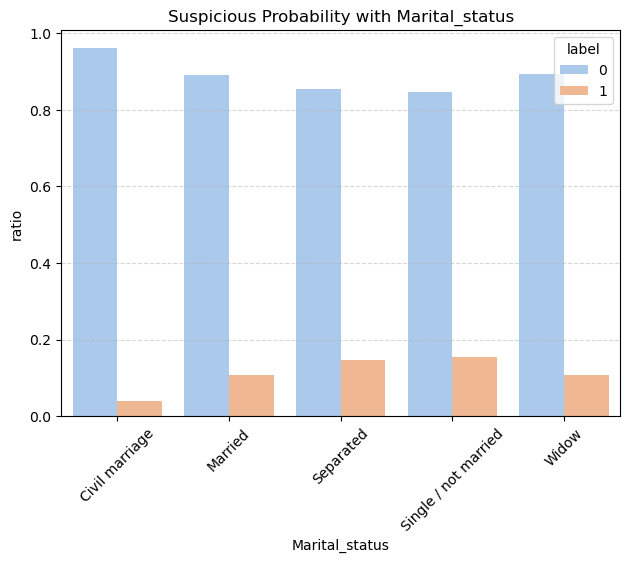

In [236]:
sns.barplot(x='Marital_status', y='ratio',hue='label', data=by_status, palette='pastel')
plt.title('Suspicious Probability with Marital_status')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =45)
plt.show()


In [234]:
by_status.sort_values(by='ratio', ascending=False)

,Marital_status,label,ratio
0,Civil marriage,0,0.960396
8,Widow,0,0.893333
2,Married,0,0.891325
4,Separated,0,0.854167
6,Single / not married,0,0.845815
7,Single / not married,1,0.154185
5,Separated,1,0.145833
3,Married,1,0.108675
9,Widow,1,0.106667
1,Civil marriage,1,0.039604


Customer dengan status single memiliki jumlah transaksi mencurigakan terbanyak 

**Housing_type vs Suspicious**

In [238]:
by_house =data_ori.groupby(['Housing_type'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

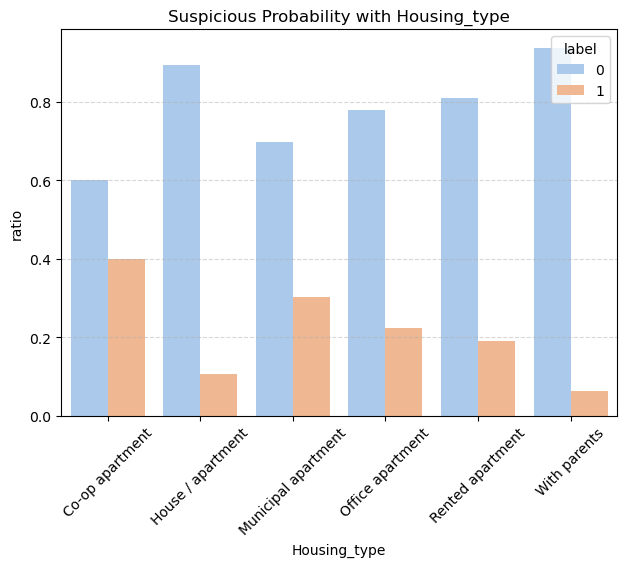

In [239]:
sns.barplot(x='Housing_type', y='ratio',hue='label', data=by_house, palette='pastel')
plt.title('Suspicious Probability with Housing_type')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =45)
plt.show()


In [240]:
by_house.sort_values(by='ratio', ascending=False)

,Housing_type,label,ratio
10,With parents,0,0.937500
2,House / apartment,0,0.894203
8,Rented apartment,0,0.809524
6,Office apartment,0,0.777778
4,Municipal apartment,0,0.698113
0,Co-op apartment,0,0.600000
1,Co-op apartment,1,0.400000
5,Municipal apartment,1,0.301887
7,Office apartment,1,0.222222
9,Rented apartment,1,0.190476


Customer dengan jenis rumah Co-op apartmen adalah paling banyak melakukan transaksi mencurigakan

**Type_Occupation vc Suspicious**

In [244]:
by_occup=data_ori.groupby(['Type_Occupation'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

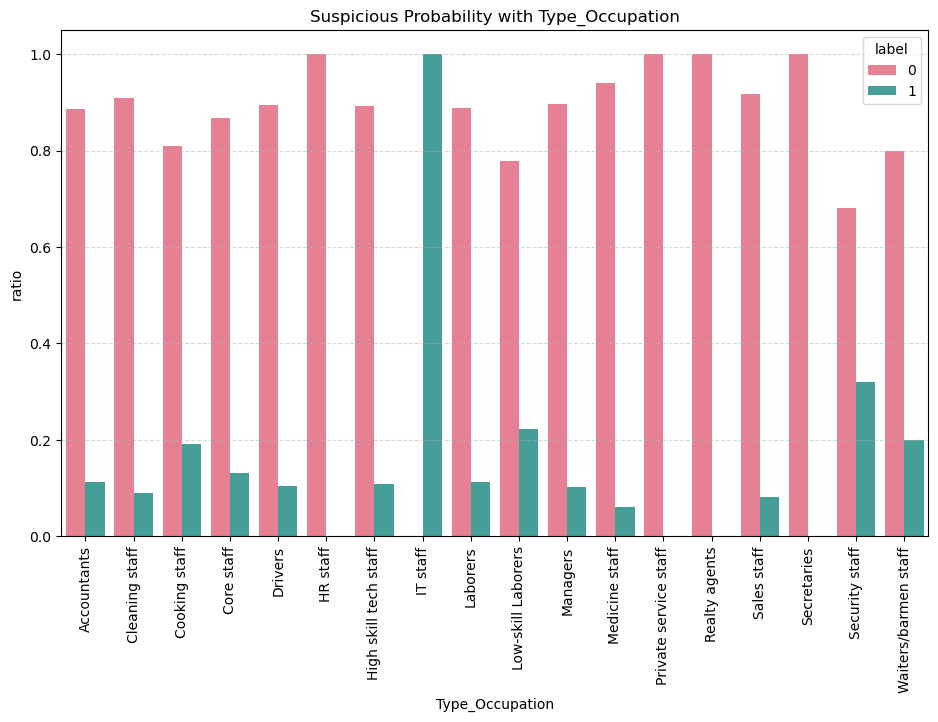

In [253]:
plt.figure(figsize=(10,6))
sns.barplot(x='Type_Occupation', y='ratio',hue='label', data=by_occup, palette='husl')
plt.title('Suspicious Probability with Type_Occupation')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =90)
plt.show()


In [250]:
by_occup.sort_values(by='ratio', ascending=False)

,Type_Occupation,label,ratio
10,HR staff,0,1.000000
26,Secretaries,0,1.000000
23,Realty agents,0,1.000000
13,IT staff,1,1.000000
22,Private service staff,0,1.000000
20,Medicine staff,0,0.940000
24,Sales staff,0,0.918033
2,Cleaning staff,0,0.909091
18,Managers,0,0.897059
8,Drivers,0,0.895349


Customer dengan occupation IT staff merupakan paling banyak melakukan transaksi mencurigakan dan tidak ada transaksi yang aman, sedangkan transaksi aman dan tidak pernah melakukan transaksi mencurigakan adalah Private service staff,HR staff dan Realty agents.  

**Annual_income vs Suspicious**

In [257]:
by_anincome = data_ori.groupby(['Annual_income'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

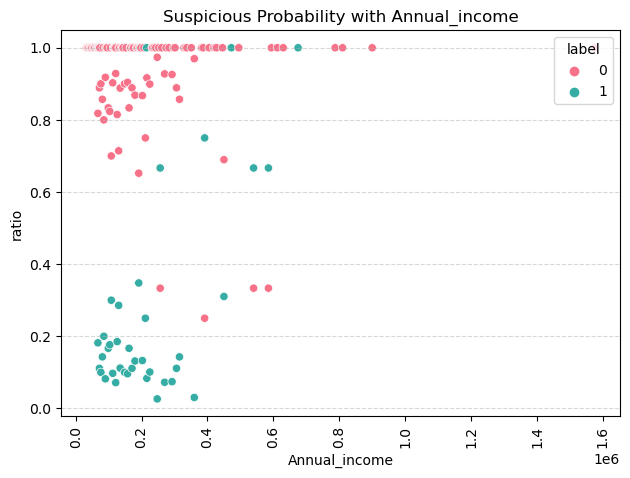

In [273]:

sns.scatterplot(x='Annual_income', y='ratio',hue='label', data=by_anincome, palette='husl')
plt.title('Suspicious Probability with Annual_income')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =90)
plt.show()


In [280]:
by_anincome[by_anincome['label']==1].sort_values(by='ratio', ascending=False)

,Annual_income,label,ratio
13,65250.00000,1,1.000000
86,195750.00000,1,1.000000
137,472500.00000,1,1.000000
93,215100.00000,1,1.000000
146,675000.00000,1,1.000000
21,72900.00000,1,1.000000
128,391500.00000,1,0.750000
141,585000.00000,1,0.666667
139,540000.00000,1,0.666667
105,256500.00000,1,0.666667


Customer dengan jumlah income 65250.00000 merupakan jumlah transaksi mencurigakan terbanyak 

**Family_Members vs Suspicious**

In [283]:
by_fam = data_ori.groupby(['Family_Members'])['label'].value_counts(normalize=True).rename('ratio').reset_index()

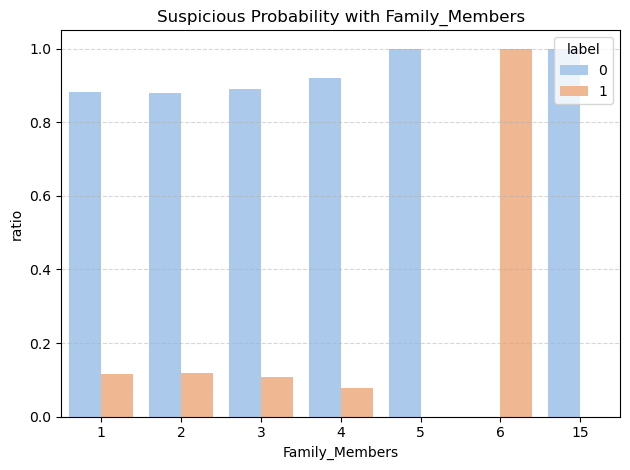

In [288]:

sns.barplot(x='Family_Members', y='ratio',hue='label', data=by_fam, palette='pastel')
plt.title('Suspicious Probability with Family_Members')
plt.grid(axis ='y', linestyle='--', alpha=0.5)
plt.legend(title='label', loc='upper right')
plt.tight_layout()
plt.xticks(rotation =0)
plt.show()


In [290]:
by_fam.sort_values(by='ratio', ascending=False)

,Family_Members,label,ratio
8,5,0,1.000000
9,6,1,1.000000
10,15,0,1.000000
6,4,0,0.921260
4,3,0,0.891791
0,1,0,0.883234
2,2,0,0.880299
3,2,1,0.119701
1,1,1,0.116766
5,3,1,0.108209


Customer dengan jumlah anggota keluarga 6 memiliki jumlah transaksi terbanyak dan tidak ada yang aman, sedangkan jumlah anggota keluarga dengan jumlah 5 & 15 tidak ada transaksi yang mencurigakan 

# Data Preprocessing

In [291]:
dfnumb

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,label,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.00000,2,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,191399.32623,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,315000.00000,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,191399.32623,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1544,0,0,0,0,225000.00000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,1,1,1,2,180000.00000,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1546,1,1,0,0,270000.00000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
response = dfnumb["label"]

dfnumb = dfnumb.drop(columns="label")

In [295]:
from sklearn.model_selection import train_test_split


In [296]:
#Membuat data set training dan test dari dependent dan independent variables


X_train, X_test, y_train, y_test = train_test_split(dfnumb, response,
                                                    stratify=response,
                                                    test_size = 0.2,
                                                    random_state = 0)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1238, 44)
Number transactions y_train dataset:  (1238,)
Number transactions X_test dataset:  (310, 44)
Number transactions y_test dataset:  (310,)


In [298]:
from sklearn.preprocessing import StandardScaler


In [299]:
# Melakukan scalling (Standarisasi) pada feature

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [301]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [302]:
#Bandingkan Algoritma Klasifikasi - Iterasi Pertama
#Bandingkan Accuracy and ROC AUC Mean Metrics

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                                                         random_state = 0,
                                                         class_weight='balanced')
))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluasi Hasil Tiap Model :


acc_results = []
auc_results = []
names = []
# set table untuk hasil performa tiap model
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluasi tiap model menggunakan k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,75.15,11.62,90.23,4.07
1,Decision Tree Classifier,69.89,9.20,85.55,3.54
0,Logistic Regression,64.92,8.50,66.73,4.56


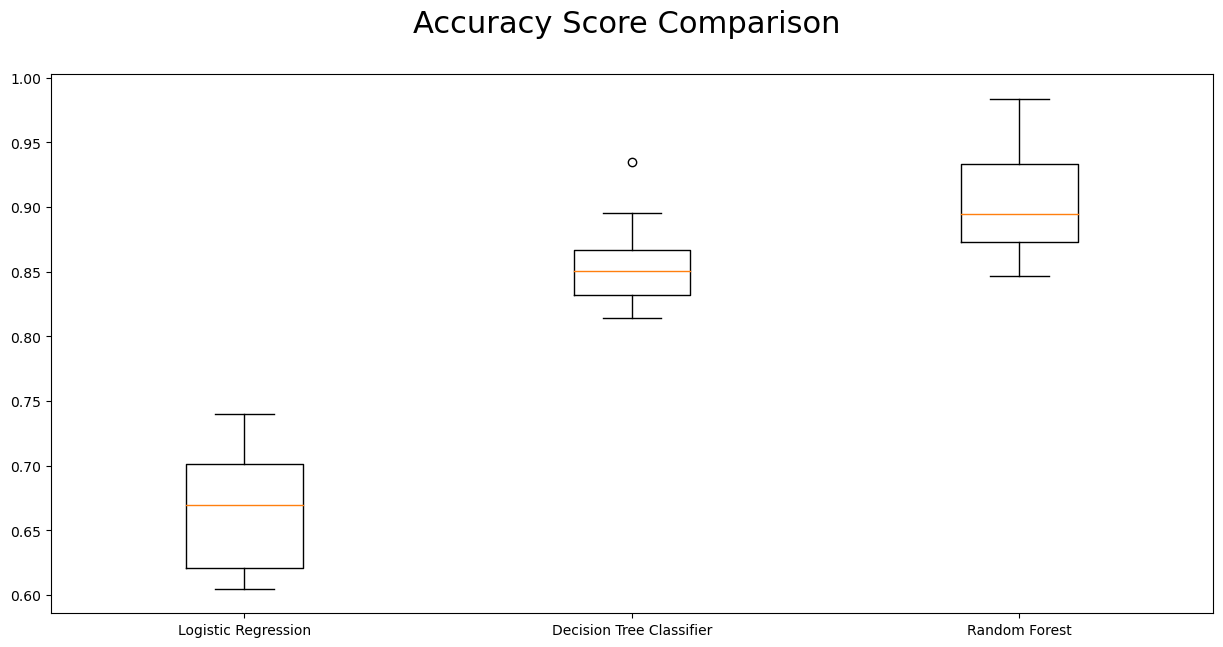

In [303]:
#Visualisasi Perbandingan Akurasi Algoritma-----------------------------------

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

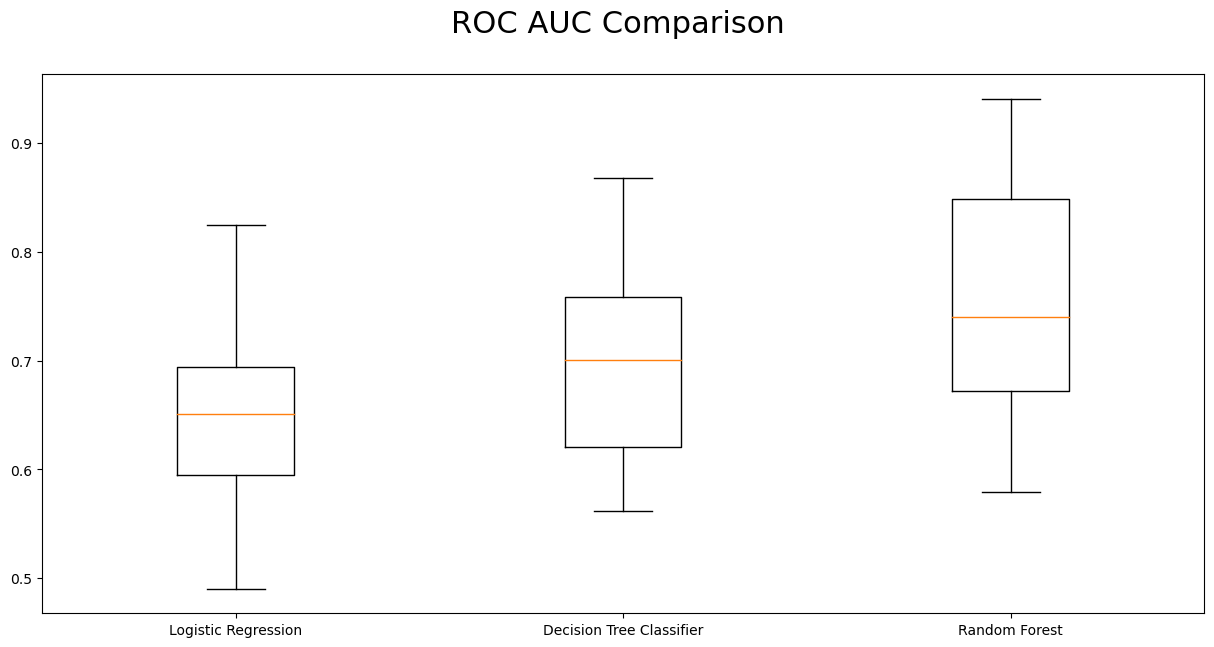

In [304]:
#Visualisasi Perbandingan AUC-ROC dari tiap algoritma test :

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

In [314]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score



In [315]:
#Bandingkan Algoritma Klasifikasi - Iterasi Kedua-----------------------------
#Logistic Regression-----------------

# Fitting Logistic Regression terhadap Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

#Decision Tree---------------------------------------------
# Fitting Decision Tree terhadap Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)


#Random Forest--------------------------------------------
# Fitting Random Forest terhadap Training set:

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13092\2756275958.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13092\2756275958.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [316]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
2        Random Forest  0.890323   0.545455  0.171429  0.260870  0.198675   
0  Logistic Regression  0.887097   0.500000  0.085714  0.146341  0.102740   
1        Decision Tree  0.832258   0.270270  0.285714  0.277778  0.282486   

    ROC-AUC  
2  0.576623  
0  0.537403  
1  0.593766  


In [317]:
#Train pada Data Test dan Evaluasi Model Pilihan


# Fit Random Forest terhadap Training dataset:

classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)


# Prediksi Test set results

y_pred = classifier.predict(X_test)

In [318]:
y_test.value_counts()

0    275
1     35
Name: label, dtype: int64

In [319]:
pd.DataFrame(y_pred)[0].value_counts()

0    299
1     11
Name: 0, dtype: int64

# Confusion Matrix

In [325]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics


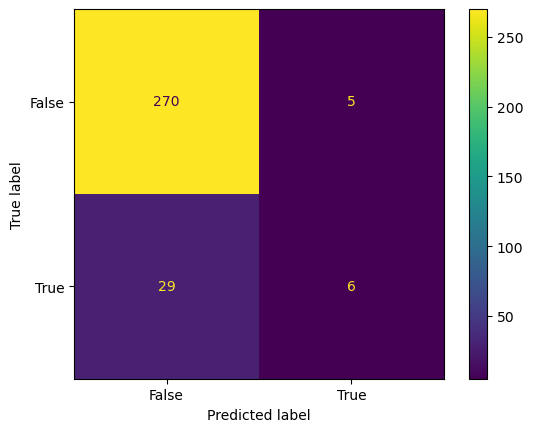

In [326]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


# Evaluasi Model


In [327]:
#Evaluasi Model pilihan terhadap  Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score  ROC AUC 
0  Random Forest  0.890323   0.545455  0.171429   0.26087  0.198675  0.576623


In [329]:
from sklearn.metrics import roc_curve


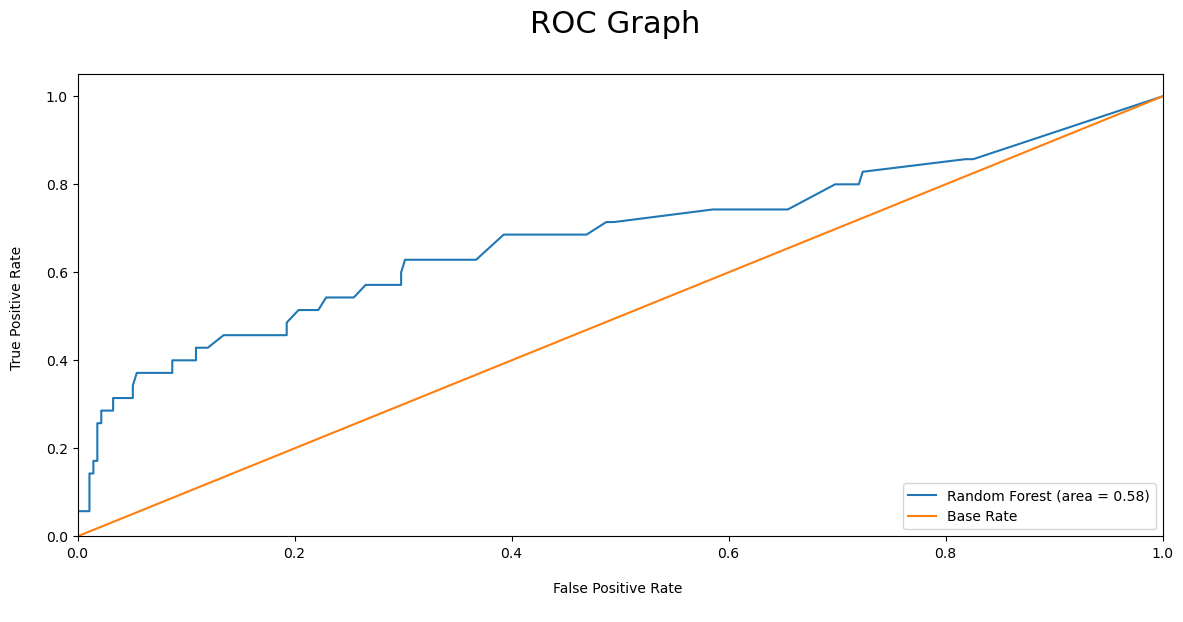

In [330]:
# Evaluasi model dengan ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

# Conclusion

* Menggunakan model random forest karena hasil evaluasinya paling baik